In [ ]:
import pandas as pd
import numpy as np
import string
!pip install contractions
import contractions
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
!pip install scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import hamming_loss

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data = pd.read_csv("/content/dolly_15k.csv")
data.isnull().sum()

,0
instruction,0
context,10545
response,0
category,0


In [ ]:
data = data.fillna({'context': ''})
data.isnull().sum()

,0
instruction,0
context,0
response,0
category,0


In [ ]:
lematizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    text = str(text)
    text = text.replace('\n', ' ').replace('\r', ' ').translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = contractions.fix(text)
    text = ' '.join(text.split())
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))

    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)

for column in ['context', 'instruction', 'response','category']:
    if column in data.columns:
        data[column] = data[column].apply(preprocess_text)

In [ ]:
print(data)

                                             instruction  \
0                       virgin australia start operating   
1                                 species fish tope rope   
2                      camels survive long without water   
3      alices parents three daughters amy jessy name ...   
4                                  tomoaki komorida born   
...                                                  ...   
15006                                      accept change   
15007                                      laser created   
15008                 difference road bike mountain bike   
15009           gis help real estate investment industry   
15010                                            masters   

                                                 context  \
0      virgin australia trading name virgin australia...   
1                                                          
2                                                          
3                                      

In [ ]:
vectorizer = TfidfVectorizer()
response_vectorizer = TfidfVectorizer()

In [ ]:
x = vectorizer.fit_transform(data['context'])
y = response_vectorizer.fit_transform(data['category'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.toarray()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

from sklearn.metrics import hamming_loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming_loss_value)

Precision: 0.24593462093462093
Hamming Loss: 0.12387612387612387


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_test_dense = y_test.toarray()

mse = mean_squared_error(y_test_dense, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.12357975357975512
Root Mean Squared Error: 0.35153912098051776


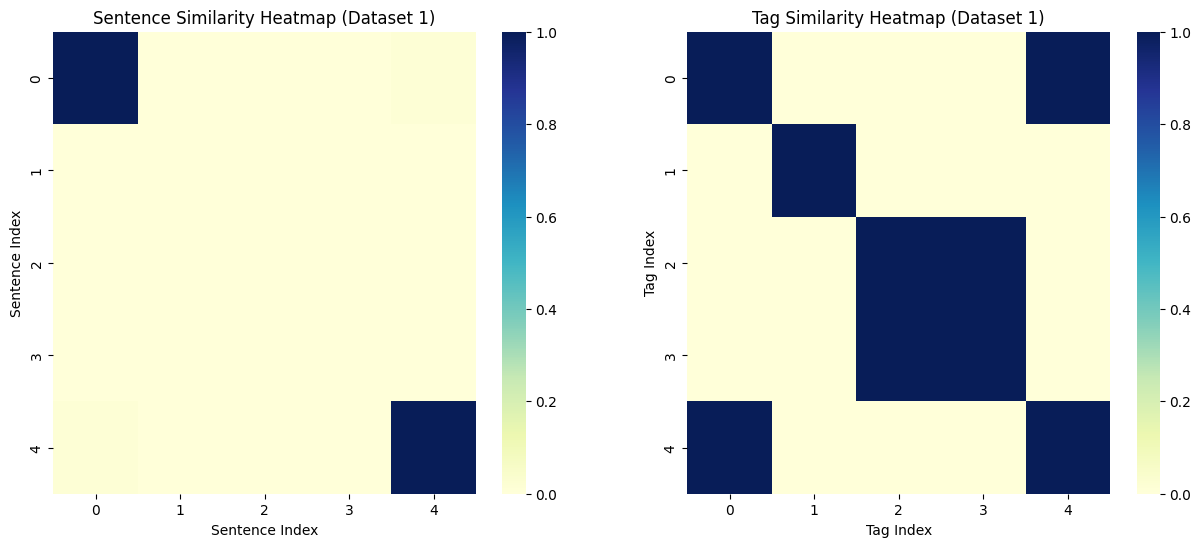

In [ ]:
sentence_vectors = vectorizer.fit_transform(data['context'][:5])
tag_vectors = vectorizer.fit_transform(data['category'][:5])

sentence_similarity = cosine_similarity(sentence_vectors)
tag_similarity = cosine_similarity(tag_vectors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(sentence_similarity, cmap="YlGnBu", ax=ax1)
ax1.set_title("Sentence Similarity Heatmap (Dataset 1)")
ax1.set_xlabel("Sentence Index")
ax1.set_ylabel("Sentence Index")

sns.heatmap(tag_similarity, cmap="YlGnBu", ax=ax2)
ax2.set_title("Tag Similarity Heatmap (Dataset 1)")
ax2.set_xlabel("Tag Index")
ax2.set_ylabel("Tag Index")

plt.show()

In [ ]:
data2 = pd.read_csv('/content/ner.csv')
data2.isnull().sum()

,0
Sentence #,0
Sentence,0
POS,0
Tag,0


In [ ]:
for column in ['Sentence #', 'Sentence', 'POS','Tag']:
    if column in data2.columns:
        data2[column] = data2[column].astype(str).str.replace('\n', ' ').str.replace('\r', ' ').str.translate(str.maketrans('', '', string.punctuation))
        data2[column] = data2[column].str.lower()
        data2[column] = data2[column].apply(lambda x: contractions.fix(x))
        data2[column] = data2[column].apply(lambda x: ' '.join(x.split()))
        data2[column] = data2[column].apply(lambda x: word_tokenize(x))
        if column in data.columns:
            data[column] = data[column].apply(lambda x: ' '.join([word for word in x if word not in (stopwords.words('english'))]))
        data2[column] = data2[column].apply(lambda token_list: [lematizer.lemmatize(word, pos='v') for word in token_list])
        data2[column] = data2[column].apply(lambda x: ' '.join(x))

In [ ]:
print(data2)

           Sentence #                                           Sentence  \
0          sentence 1  thousands of demonstrators have march through ...   
1          sentence 2  families of soldier kill in the conflict join ...   
2          sentence 3  they march from the house of parliament to a r...   
3          sentence 4  police put the number of marchers at 10000 whi...   
4          sentence 5  the protest come on the eve of the annual conf...   
...               ...                                                ...   
47954  sentence 47955  indian border security force be accuse their p...   
47955  sentence 47956  indian officials say no one be injure in satur...   
47956  sentence 47957  two more land in field belong to a nearby village   
47957  sentence 47958  they say not all of the rocket explode upon im...   
47958  sentence 47959        indian force say they respond to the attack   

                                                     POS  \
0      nns in nns vbp vbn i

In [ ]:
data2['Sentence #'] = LabelEncoder().fit_transform(data2['Sentence #'])

In [ ]:
mlb = MultiLabelBinarizer()

x1 = vectorizer.fit_transform(data2['Sentence'])
y1 = mlb.fit_transform(data2['Tag'])

In [ ]:
x2 = data2[['Sentence #','POS']]
y2 = data2[['Tag']]

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

train_data = pd.DataFrame({"Sentence #": data2['Sentence #'], "POS": data2['POS'], "Tag": data2['Tag']})
test_data = pd.DataFrame({"Sentence #": data2['Sentence #'], "POS": data2['POS'], "Tag": data2['Tag']})

kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(x1_train, y1_train)

KNeighborsRegressor()

In [ ]:
y_pred = kn.predict(x1_test)

In [ ]:
y_test_dense = y1_test

mse = mean_squared_error(y_test_dense, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.11900975171617152
Root Mean Squared Error: 0.34497790033011033


In [ ]:
x1 = vectorizer.fit_transform(data2['Sentence'])
y1 = mlb.fit_transform(data2['Tag'].astype(str))

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x1_train, y1_train)

KNeighborsClassifier()

In [ ]:
y_pred = kn.predict(x1_test)

precision = precision_score(y1_test, y_pred, average='weighted')
print("Precision:", precision)

hamming_loss_value = hamming_loss(y1_test, y_pred)
print("Hamming Loss:", hamming_loss_value)

Precision: 0.8950108951547161
Hamming Loss: 0.16039006864694938


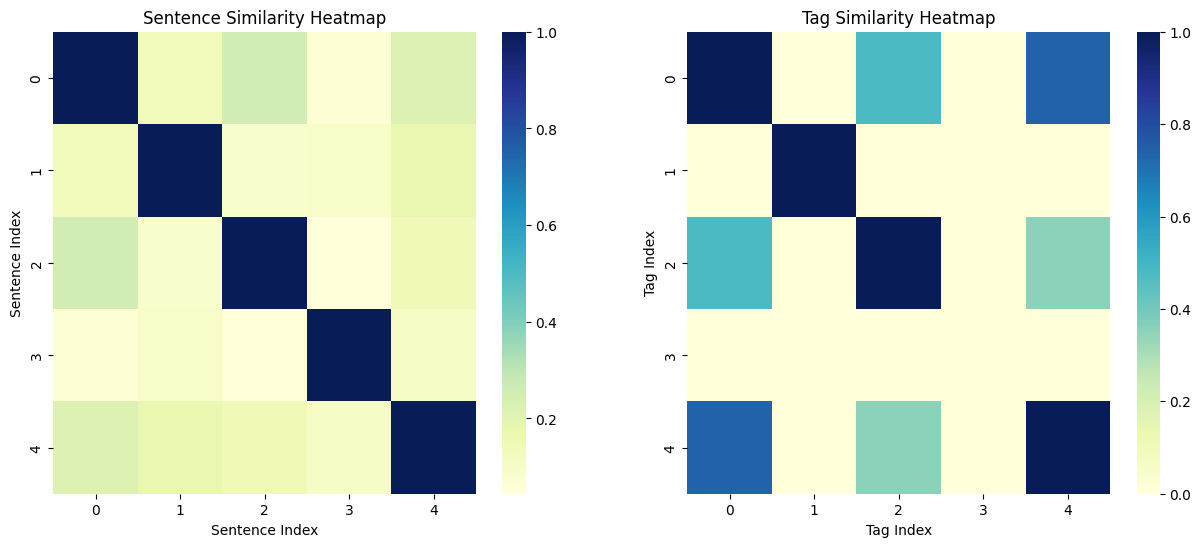

In [ ]:
sentence_vectors = vectorizer.fit_transform(data2['Sentence'][:5])
tag_vectors = vectorizer.fit_transform(data2['Tag'][:5])

sentence_similarity = cosine_similarity(sentence_vectors)
tag_similarity = cosine_similarity(tag_vectors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(sentence_similarity, cmap="YlGnBu", ax=ax1)
ax1.set_title("Sentence Similarity Heatmap")
ax1.set_xlabel("Sentence Index")
ax1.set_ylabel("Sentence Index")

sns.heatmap(tag_similarity, cmap="YlGnBu", ax=ax2)
ax2.set_title("Tag Similarity Heatmap")
ax2.set_xlabel("Tag Index")
ax2.set_ylabel("Tag Index")

plt.show()

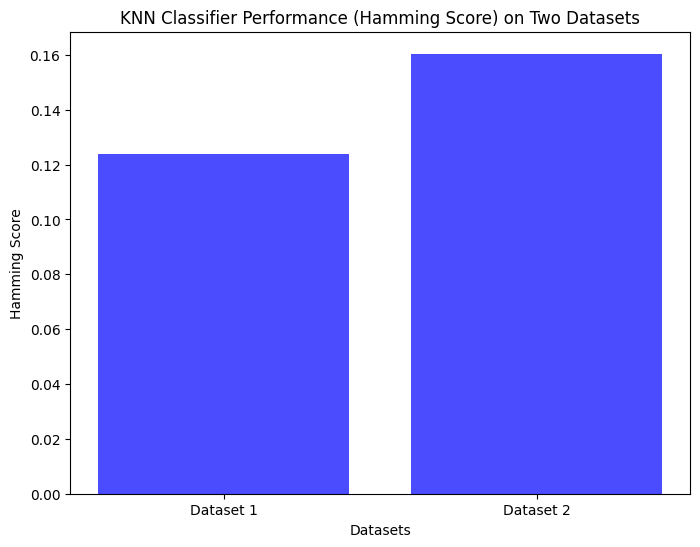

In [ ]:
datasets = ['Dataset 1', 'Dataset 2']
hamming_scores = [0.12387612387612387, 0.16039006864694938]

bar_positions = np.arange(len(datasets))
plt.figure(figsize=(8, 6))

plt.bar(bar_positions, hamming_scores, color='b', align='center', alpha=0.7)
plt.xlabel('Datasets')
plt.ylabel('Hamming Score')
plt.title('KNN Classifier Performance (Hamming Score) on Two Datasets')
plt.xticks(bar_positions, datasets)

plt.show()

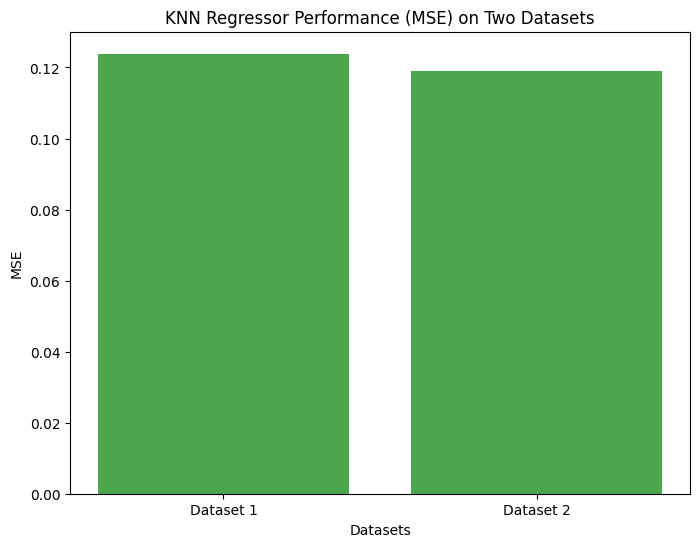

In [ ]:
datasets = ['Dataset 1', 'Dataset 2']

knn_regressor_performance = [0.12387612387612386, 0.11900975171617152]

bar_positions = np.arange(len(datasets))

plt.figure(figsize=(8, 6))
plt.bar(bar_positions, knn_regressor_performance, color='g', align='center', alpha=0.7)

plt.xlabel('Datasets')
plt.ylabel('MSE')
plt.title('KNN Regressor Performance (MSE) on Two Datasets')
plt.xticks(bar_positions, datasets)

plt.show()

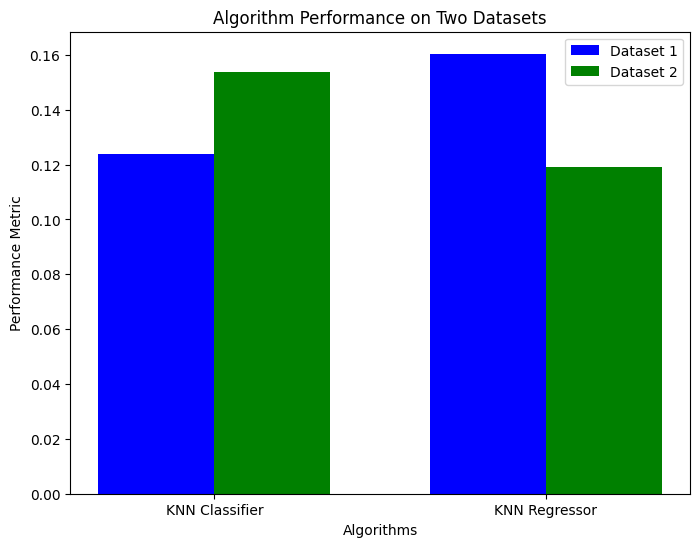

In [ ]:
algorithms = ['KNN Classifier', 'KNN Regressor']

dataset1_performance = [0.12387612387612387, 0.16039006864694938]
dataset2_performance = [0.15387612387612386, 0.11900975171617152]

bar_width = 0.35

r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(8, 6))
plt.bar(r1, dataset1_performance, color='b', width=bar_width, label='Dataset 1')

plt.bar(r2, dataset2_performance, color='g', width=bar_width, label='Dataset 2')

plt.xlabel('Algorithms')
plt.ylabel('Performance Metric')
plt.title('Algorithm Performance on Two Datasets')
plt.xticks([r + bar_width/2 for r in range(len(algorithms))], algorithms)
plt.legend()

plt.show()

In [ ]:
merged_data = pd.concat([data, data2], ignore_index=True)

merged_data.reset_index(drop=True, inplace=True)


In [ ]:
!pip install spello
from spello.model import SpellCorrectionModel

In [ ]:
sp = SpellCorrectionModel(language="en")

In [ ]:
merged_data = merged_data['Sentence'].tolist()
sp.train(merged_data)

Spello training started..


DEBUG:spello.settings:Spello training started..


Context model training started ...


DEBUG:spello.settings:Context model training started ...


Symspell training started ...


DEBUG:spello.settings:Symspell training started ...


Phoneme training started ...


DEBUG:spello.settings:Phoneme training started ...


Spello training completed successfully ...


DEBUG:spello.settings:Spello training completed successfully ...


In [ ]:
sp.spell_correct(input("Enter the value: "))

Enter the value: aple


DEBUG:spello.settings:Symspell suggestions: [('able', 1), ('apple', 1), ('pale', 1), ('ample', 1), ('able', 1), ('apple', 1), ('ample', 1), ('able', 1), ('apple', 1), ('pale', 1), ('ample', 1)]
DEBUG:spello.settings:Phoneme suggestions: [('apple', 1), ('apple', 1), ('apple', 1), ('able', 1), ('able', 1), ('able', 1), ('apply', 2), ('apply', 2), ('abel', 2), ('abel', 2), ('abul', 3), ('apollo', 3), ('appal', 3), ('appeal', 3), ('abalo', 3)]
DEBUG:spello.settings:Suggestions dict from phoneme and symspell are: {'aple': ['apple', 'able', 'pale', 'ample', 'apply', 'abel', 'abul', 'apollo', 'appal', 'appeal', 'abalo']}
DEBUG:spello.settings:text after context model: apple
DEBUG:spello.settings:Spell-correction Results {'original_text': 'aple', 'spell_corrected_text': 'apple', 'correction_dict': {'aple': 'apple'}}


{'original_text': 'aple',
 'spell_corrected_text': 'apple',
 'correction_dict': {'aple': 'apple'}}

In [ ]:
!pip install gensim
from gensim.models import Word2Vec

In [ ]:
sentences_data = []
for item in merged_data:
  if isinstance(item, dict) and "Sentences" in item:
    sentences_data = item["Sentences"]
    break

  elif isinstance(item, str) and "Sentences" in item:
    sentences_data = item
    break
  elif isinstance(item, str):
      sentences_data.append(item.split())

if not sentences_data:
    print("Warning: 'Sentences' not found in merged_data. Using the whole list as sentences_data.")
    sentences_data = merged_data


model = Word2Vec(sentences=sentences_data, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
vocabulary = model.wv.key_to_index
vocabulary

{'the': 0,
 'in': 1,
 'of': 2,
 'be': 3,
 'to': 4,
 'a': 5,
 'and': 6,
 'say': 7,
 'have': 8,
 's': 9,
 'for': 10,
 'on': 11,
 'that': 12,
 'with': 13,
 'at': 14,
 'from': 15,
 'by': 16,
 'he': 17,
 'us': 18,
 'an': 19,
 'as': 20,
 'it': 21,
 'kill': 22,
 'will': 23,
 'his': 24,
 'president': 25,
 'officials': 26,
 'government': 27,
 'mr': 28,
 'state': 29,
 'two': 30,
 'people': 31,
 'after': 32,
 'not': 33,
 'its': 34,
 'but': 35,
 'they': 36,
 'more': 37,
 'attack': 38,
 'also': 39,
 'new': 40,
 'report': 41,
 'minister': 42,
 'unite': 43,
 'last': 44,
 'military': 45,
 'force': 46,
 'who': 47,
 'country': 48,
 'than': 49,
 'police': 50,
 'group': 51,
 'their': 52,
 'iraq': 53,
 'one': 54,
 'which': 55,
 'security': 56,
 'this': 57,
 'call': 58,
 'about': 59,
 'year': 60,
 'other': 61,
 'least': 62,
 'tuesday': 63,
 'take': 64,
 'since': 65,
 'world': 66,
 'thursday': 67,
 'week': 68,
 'meet': 69,
 'include': 70,
 'iran': 71,
 'over': 72,
 'friday': 73,
 'monday': 74,
 'wednesday': 

In [ ]:
sim_words = model.wv.most_similar(input("Enter: "))
sim_words

Enter: apple


[('computer', 0.8886122107505798),
 ('scientists', 0.8852624297142029),
 ('players', 0.8831658959388733),
 ('artists', 0.8807661533355713),
 ('scientific', 0.8784263134002686),
 ('advertise', 0.8778202533721924),
 ('clothe', 0.8776611089706421),
 ('store', 0.8769090175628662),
 ('data', 0.8731483817100525),
 ('serpent', 0.8721248507499695)]

In [ ]:
data['prompt'] = data['context'] + " " + data['instruction']
data['completion'] = data['response']

data = data.dropna(subset=['prompt', 'completion'])


In [ ]:
!pip install langid
import langid

x = vectorizer.fit_transform(data['context'])

def get_suggestions(input_text, top_n=5, max_length=30):
    input_vec = vectorizer.transform([input_text])
    similarities = cosine_similarity(input_vec, x)

    similar_indices = similarities.argsort()[0][-top_n:][::-1]
    suggestions = []

    for index in similar_indices:
        suggestion = data.iloc[index]['context']

        if langid.classify(suggestion)[0] == 'en':
            truncated_suggestion = suggestion[:max_length].strip()

            if len(suggestion) > max_length:
                last_space = truncated_suggestion.rfind(' ')
                if last_space != -1:
                    truncated_suggestion = truncated_suggestion[:last_space].strip()

            suggestions.append(truncated_suggestion)

    return suggestions

user_input = input("Enter your text: ")
suggestions = get_suggestions(user_input)
print("Autocomplete Suggestions:")
for i, suggestion in enumerate(suggestions, 1):
    print(f"{i}. {suggestion}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=6fd75d7aff74b4785f9b2329565363c3102ace5047e930d5b883b32bf3d630c9
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
Enter your text: hello apple
Autocomplete Suggestions:
1. apple inc american
2. apple inc american
3. apple founded apple computer
4. ciao tʃaʊ chow italian
5. development apple smartphone


In [ ]:
!pip install transformers simpletransformers
from simpletransformers.ner import NERModel, NERArgs
from sklearn.metrics import accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00
  

In [ ]:
label = data2['Tag'].unique().tolist()

In [ ]:
args = NERArgs()
args.num_train_epochs = 5
args.learning_rate = 1e-4
args.overwrite_output_dir = True
args.train_batch_size = 32
args.eval_batch_size = 32
args.max_seq_length = 10

In [ ]:
model = NERModel('bert', 'bert-base-cased', labels=label, args=args, use_cuda=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
train_data.rename(columns={"Sentence #": "sentence_id","POS":"words","Tag":"labels"}, inplace=True)
test_data.rename(columns={"Sentence #": "sentence_id","POS":"words","Tag":"labels"}, inplace=True)

model.train_model(train_data, eval_data=test_data, acc=accuracy_score)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/47959 [00:00<?, ?it/s]

(47959, 9.818479334413986)

In [ ]:
prediction, model_outputs = model.predict(["What is the new name in Banglore"])

print("Prediction:", prediction)
print("Model Outputs:", model_outputs)


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction: [[{'What': 'o o o o o o o o o o o'}, {'is': 'o o o o o o o o o o o'}, {'the': 'o o o o o o o o o o o'}, {'new': 'o o o o o o o o o o'}, {'name': 'o o o o o o o o o o'}, {'in': 'o o o o o o o o o o o'}, {'Banglore': 'o o o o o o o o o o o'}]]
Model Outputs: [[{'What': [[-3.1307325, -3.3196392, -2.5093822, 0.9193299, -3.451325, -3.113088, -2.9534295, -3.0565057, -3.0061357, -2.7484827, 0.41124555, -3.434843, -3.1220357, -2.995082, -2.797574, -2.9494004, -2.8638918, -3.0264497, -3.1063774, -2.3338287, -2.765163, -3.0952744, -3.0894027, -2.8781035, -3.0838063, -3.1228242, -2.9441752, -2.9323027, -3.0084212, -3.0207584, -3.0077376, -2.6389313, -2.3808823, -2.9490871, -3.0984983, -2.858781, 0.38544708, -3.0351405, 1.227838, -3.3590298, -2.855637, -3.1779182, -2.7304742, -3.2146952, -3.0143719, -2.7977538, -3.1815026, 0.6798829, -3.1681936, -3.1232963, -3.1678681, -3.0893223, 0.99261045, -2.865752, -3.347983, -2.736909, -2.9695156, -3.0366552, -2.9116666, 0.5526345, 0.46469945, -2

In [ ]:
def process_user_input(user_input):

    corrected_text_dict = sp.spell_correct(user_input)
    corrected_text = corrected_text_dict.get('suggestion', user_input)

    autocomplete_suggestions = get_suggestions(corrected_text)

    ner_results = model.predict([corrected_text])

    predicted_labels = ner_results[0][0]

    words = corrected_text.split()

    entities = [(word, entity) for word, entity in zip(words, predicted_labels)]

    return {
        "corrected_text": corrected_text,
        "autocomplete_suggestions": autocomplete_suggestions,
        "ner_results": entities,
    }

user_input = input("Enter your text: ")
results = process_user_input(user_input)

print("Corrected Text:", results["corrected_text"])
print("Autocomplete Suggestions:", results["autocomplete_suggestions"])
print("NER Results:", results["ner_results"])

Enter your text: Hello apple


DEBUG:spello.settings:Suggestions dict from phoneme and symspell are: {}
DEBUG:spello.settings:text after context model: Hello apple
DEBUG:spello.settings:Spell-correction Results {'original_text': 'Hello apple', 'spell_corrected_text': 'Hello apple', 'correction_dict': {}}


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

Corrected Text: Hello apple
Autocomplete Suggestions: ['apple inc american', 'apple inc american', 'apple founded apple computer', 'ciao tʃaʊ chow italian', 'development apple smartphone']
NER Results: [('Hello', {'Hello': 'o o o bgeo o o o borg o btim o o'}), ('apple', {'apple': 'o o o o o o o bgpe o o bgeo igeo o'})]
